# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [4]:
print(cities[0:5])

['mataura', 'samarai', 'port alfred', 'egvekinot', 'atuona']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Create blank lists to store weather data
lat_list=[]
long_list=[]
max_temp_list=[]
hum_list=[]
cloud_list=[]
wind_list=[]
country_list=[]
date_list=[]
set_count=1
index_count=0

base_url='http://api.openweathermap.org/data/2.5/weather?'

print("Beginning Data Retrieval")
print("---"*15)

for each_city in cities:

    print(f'Proccessing Record {index_count} of Set {set_count} | {each_city}')

    query_params={
    'q': each_city,
    'units': 'imperial',
    'appid': weather_api_key
    
    }

    response=requests.get(base_url, params=query_params)


    data=response.json()

    try:

        lat=data['coord']['lat']
        lng=data['coord']['lon']
        max_temp=data['main']['temp_max']
        hum=data['main']['humidity']
        cloud=data['clouds']['all']
        wind=data['wind']['speed']
        country=data['sys']['country']
        date=data['dt']
        
        
        lat_list.append(lat)
        long_list.append(lng)
        max_temp_list.append(max_temp)
        hum_list.append(hum)
        cloud_list.append(cloud)
        wind_list.append(wind)
        country_list.append(country)
        date_list.append(date)
        
    except:
        print(f'City not found. Skipping...')
        lat_list.append(np.nan)
        long_list.append(np.nan)
        max_temp_list.append(np.nan)
        hum_list.append(np.nan)
        cloud_list.append(np.nan)
        wind_list.append(np.nan)
        country_list.append(np.nan)
        date_list.append(np.nan)
    
    
    index_count=index_count+1
    
    if index_count > 50:
        index_count=0
        set_count=set_count+1
        
print("---"*15)
print("Data Retrieval Complete")
print("---"*15)

Beginning Data Retrieval
---------------------------------------------
Proccessing Record 0 of Set 1 | mataura
Proccessing Record 1 of Set 1 | samarai
Proccessing Record 2 of Set 1 | port alfred
Proccessing Record 3 of Set 1 | egvekinot
Proccessing Record 4 of Set 1 | atuona
Proccessing Record 5 of Set 1 | mar del plata
Proccessing Record 6 of Set 1 | tiksi
Proccessing Record 7 of Set 1 | yangambi
Proccessing Record 8 of Set 1 | avarua
Proccessing Record 9 of Set 1 | faanui
Proccessing Record 10 of Set 1 | sentyabrskiy
City not found. Skipping...
Proccessing Record 11 of Set 1 | agua dulce
Proccessing Record 12 of Set 1 | yayva
Proccessing Record 13 of Set 1 | azimur
City not found. Skipping...
Proccessing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Proccessing Record 15 of Set 1 | cape town
Proccessing Record 16 of Set 1 | busselton
Proccessing Record 17 of Set 1 | georgetown
Proccessing Record 18 of Set 1 | carmen
Proccessing Record 19 of Set 1 | hermanus
Procce

Proccessing Record 29 of Set 4 | tombouctou
Proccessing Record 30 of Set 4 | bara
Proccessing Record 31 of Set 4 | aklavik
Proccessing Record 32 of Set 4 | tilichiki
Proccessing Record 33 of Set 4 | hofn
Proccessing Record 34 of Set 4 | paamiut
Proccessing Record 35 of Set 4 | necochea
Proccessing Record 36 of Set 4 | nizhneyansk
City not found. Skipping...
Proccessing Record 37 of Set 4 | katobu
Proccessing Record 38 of Set 4 | kavieng
Proccessing Record 39 of Set 4 | ullapool
Proccessing Record 40 of Set 4 | ormara
Proccessing Record 41 of Set 4 | pinar del rio
Proccessing Record 42 of Set 4 | namibe
Proccessing Record 43 of Set 4 | cabo san lucas
Proccessing Record 44 of Set 4 | sargatskoye
Proccessing Record 45 of Set 4 | luderitz
Proccessing Record 46 of Set 4 | esperance
Proccessing Record 47 of Set 4 | ereymentau
Proccessing Record 48 of Set 4 | glubokoe
City not found. Skipping...
Proccessing Record 49 of Set 4 | ponta do sol
Proccessing Record 50 of Set 4 | barcelona
Proccessi

Proccessing Record 11 of Set 8 | castelo branco
Proccessing Record 12 of Set 8 | zenica
Proccessing Record 13 of Set 8 | cagliari
Proccessing Record 14 of Set 8 | kargil
Proccessing Record 15 of Set 8 | ipora
Proccessing Record 16 of Set 8 | fairbanks
Proccessing Record 17 of Set 8 | prescott
Proccessing Record 18 of Set 8 | yerbogachen
Proccessing Record 19 of Set 8 | kilakarai
Proccessing Record 20 of Set 8 | moba
Proccessing Record 21 of Set 8 | liku
Proccessing Record 22 of Set 8 | isla mujeres
Proccessing Record 23 of Set 8 | stokmarknes
Proccessing Record 24 of Set 8 | victoria
Proccessing Record 25 of Set 8 | grand gaube
Proccessing Record 26 of Set 8 | mentok
City not found. Skipping...
Proccessing Record 27 of Set 8 | setermoen
Proccessing Record 28 of Set 8 | tahara
Proccessing Record 29 of Set 8 | umzimvubu
City not found. Skipping...
Proccessing Record 30 of Set 8 | olafsvik
Proccessing Record 31 of Set 8 | araxa
Proccessing Record 32 of Set 8 | vetlanda
Proccessing Record 

Proccessing Record 44 of Set 11 | hanmer springs
Proccessing Record 45 of Set 11 | ribnitz-damgarten
Proccessing Record 46 of Set 11 | pimentel
Proccessing Record 47 of Set 11 | kholmogory
Proccessing Record 48 of Set 11 | mvangue
Proccessing Record 49 of Set 11 | martapura
Proccessing Record 50 of Set 11 | arkansas city
Proccessing Record 0 of Set 12 | kaduna
Proccessing Record 1 of Set 12 | saint anthony
Proccessing Record 2 of Set 12 | alofi
Proccessing Record 3 of Set 12 | llangefni
Proccessing Record 4 of Set 12 | dudinka
Proccessing Record 5 of Set 12 | saumur
Proccessing Record 6 of Set 12 | kamenskoye
City not found. Skipping...
Proccessing Record 7 of Set 12 | gazli
Proccessing Record 8 of Set 12 | chute-aux-outardes
Proccessing Record 9 of Set 12 | inongo
Proccessing Record 10 of Set 12 | den helder
Proccessing Record 11 of Set 12 | manta
Proccessing Record 12 of Set 12 | agropoli
Proccessing Record 13 of Set 12 | pisco
Proccessing Record 14 of Set 12 | kropotkin
Proccessing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create df
city_dict={
    "City": cities,
    "Lat":lat_list,
    "Lng":long_list,
    "Max Temp": max_temp_list,
    "Humidity": hum_list,
    "Cloudiness": cloud_list,
    "Wind Speed": wind_list,
    "Country": country_list,
    "Date": date_list
    
}

city_data_df=pd.DataFrame(city_dict)

In [10]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,75.00,52.0,100.0,10.00,NZ,1.611696e+09
1,samarai,-10.6167,150.6667,82.24,74.0,100.0,6.96,PG,1.611696e+09
2,port alfred,-33.5906,26.8910,69.01,95.0,88.0,1.01,ZA,1.611696e+09
3,egvekinot,66.3167,-179.1667,-15.38,87.0,62.0,12.24,RU,1.611696e+09
4,atuona,-9.8000,-139.0333,78.35,76.0,3.0,16.55,PF,1.611696e+09
5,mar del plata,-38.0023,-57.5575,75.00,88.0,0.0,6.91,AR,1.611695e+09
6,tiksi,71.6872,128.8694,-36.83,83.0,95.0,2.64,RU,1.611696e+09
7,yangambi,0.8102,24.4336,71.56,92.0,31.0,2.82,CD,1.611696e+09
8,avarua,-21.2078,-159.7750,86.00,66.0,77.0,17.27,CK,1.611695e+09
9,faanui,-16.4833,-151.7500,81.27,74.0,14.0,16.60,PF,1.611695e+09


In [11]:
city_data_df.to_csv(output_data_file)

In [12]:
clean_city_df=city_data_df.dropna()
display(clean_city_df.describe())

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Checked, returns 0. Skip step
city_data_df.head()
hum_filter=city_data_df['Humidity']>100
high_hum_df=city_data_df.loc[hum_filter,:]
high_hum_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [15]:
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,75.00,52.0,100.0,10.00,NZ,1.611696e+09
1,samarai,-10.6167,150.6667,82.24,74.0,100.0,6.96,PG,1.611696e+09
2,port alfred,-33.5906,26.8910,69.01,95.0,88.0,1.01,ZA,1.611696e+09
3,egvekinot,66.3167,-179.1667,-15.38,87.0,62.0,12.24,RU,1.611696e+09
4,atuona,-9.8000,-139.0333,78.35,76.0,3.0,16.55,PF,1.611696e+09


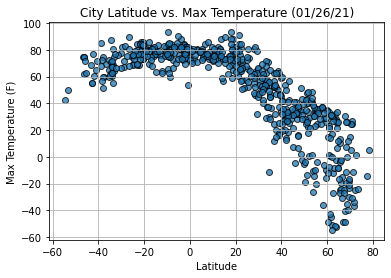

Analyzing relationship between latitude and max temperature


In [18]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Max Temp']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Max Temperature (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('output_data/lat_vs_temp_chart.png')
plt.show()
print(f'Analyzing relationship between latitude and max temperature')

This plot illustrates that as latitude approaches the equator (latitude of 0 degrees), temperature increases. As latitudes increase into the northern hemisphere, specifically (denoted by a positive value of latitude), temperatures decrease. Especially as the northern hemisphere is currently experience winter, this makes logical sense. 

## Latitude vs. Humidity Plot

In [177]:
clean_city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,55.00,68.0,61.0,12.68,AU,1.611678e+09
1,bireun,5.2030,96.7009,77.52,83.0,98.0,4.18,ID,1.611678e+09
2,grindavik,63.8424,-22.4338,26.60,54.0,0.0,21.85,IS,1.611678e+09
3,nuuk,64.1835,-51.7216,21.20,73.0,75.0,9.22,GL,1.611678e+09
4,vao,-22.6667,167.4833,76.73,75.0,78.0,19.64,NC,1.611678e+09


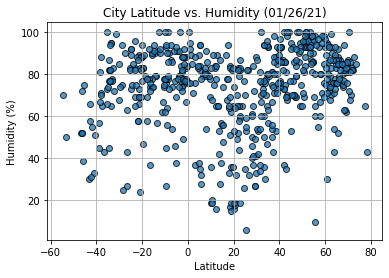

Analyzing relationship between latitude and humidity


In [21]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Humidity']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Humidity (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('output_data/lat_vs_humidity_chart.png')
plt.show()
print(f'Analyzing relationship between latitude and humidity')

This plot illustrates that there are a wide range of humidities at any given latitude. Other factors (such as latitude, cloudiness, or max temp) may be more beneficial in predicting humidity of a specific location. 

## Latitude vs. Cloudiness Plot

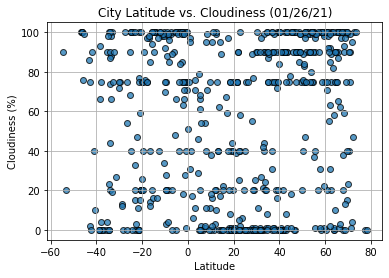

Analyzing relationship between latitude and cloudiness


In [22]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Cloudiness']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Cloudiness (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('output_data/lat_vs_cloud_chart.png')
plt.show()
print(f'Analyzing relationship between latitude and cloudiness')

This plot is similar to latitude vs. humidity in that there is a wide range of cloudiness at any given latitude.


## Latitude vs. Wind Speed Plot

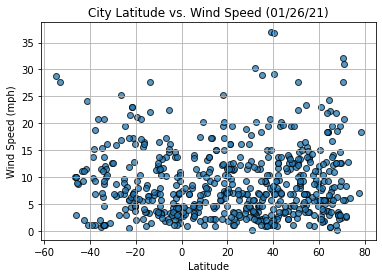

Analyzing relationship between latitude and wind speed


In [23]:
x_values = clean_city_df['Lat']
y_values = clean_city_df['Wind Speed']
plt.scatter(x=x_values, y=y_values, marker='o', edgecolors='black', alpha=0.75)
plt.grid()
plt.title("City Latitude vs. Wind Speed (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('output_data/lat_vs_wind_chart.png')
plt.show()
print(f'Analyzing relationship between latitude and wind speed')

This plot shows a wide range of wind speeds at any given latitude, but the majority of the wind speeds fall between 0 and 15 mph. Wind speeds above 15 mph are more rare, and these locations could be analyzed to be outliers or compared using other factors. 


## Linear Regression

In [24]:
# get northern hemisphere values using filter
north_filter=clean_city_df['Lat']>=0
north_values=clean_city_df.loc[north_filter,'Lat']
# display(len(north_values))


south_filter=clean_city_df['Lat']<0
south_values=clean_city_df.loc[south_filter,'Lat']
# display(len(south_values))

In [25]:
import scipy.stats as sts

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8480948961392323


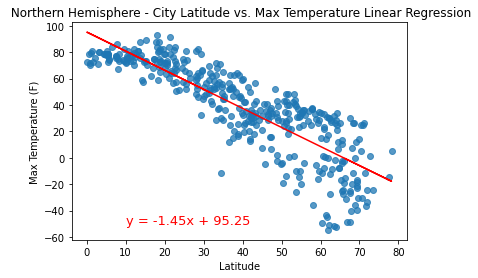

In [29]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Max Temp']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title( " Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, -50),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/north_lat_temp_regression.png', bbox_inches="tight")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5139801139782118


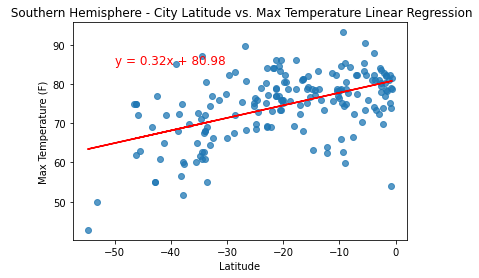

In [40]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Max Temp']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,85),fontsize=12,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/south_lat_temp_regression.png', bbox_inches="tight")
plt.show()

 In both hemispheres, as latitudes approach the equator (latitude value of 0), max temperature increases.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3395515381786417


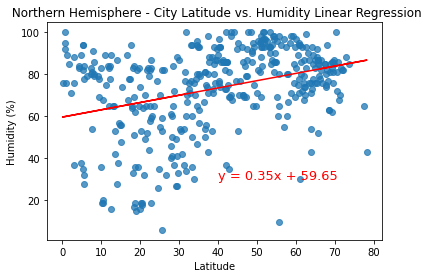

In [34]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Humidity']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Humidity Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40, 30),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/north_lat_hum_regression.png', bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29752672846378364


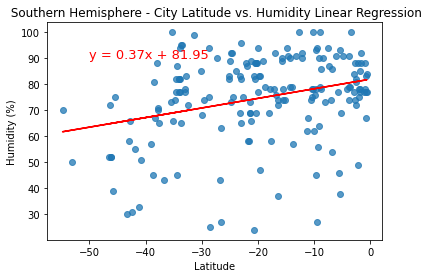

In [36]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Humidity']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Humidity Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50, 90),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/south_lat_hum_regression.png', bbox_inches="tight")
plt.show()

In the northern hemisphere, as latitude increases, humidity increases but not with a strong correlation. In the southern hemisphere, the closer to the equator a location, the highter the humidity. Intuitively, one would think that that humidity increases with proximity to the equator. The high humidity in the northern hemisphere at greater latitudes is counterintuitive. This could be baesd on seasons and a higher deal of moisture in the air due to cloud cover, rain, or snowfall weather patterns during the winter months.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.35326549147895825


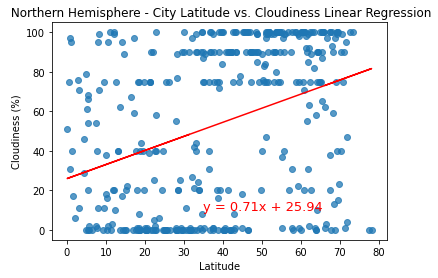

In [37]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Cloudiness']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(35, 10),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/north_lat_cloud_regression.png', bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.1997831400361335


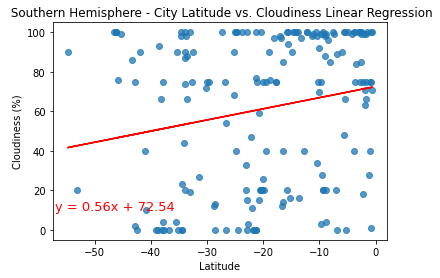

In [39]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Cloudiness']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
`
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-57, 10),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/south_lat_cloud_regression.png', bbox_inches="tight")
plt.show()

Based on these figures, cloudiness (%) has a similar relationship to latitude as that of humidity and latitude. Further analysis and understanding of differences between and interconnectedness of cloud cover and humidity would be warranted. 


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.12409742736539496


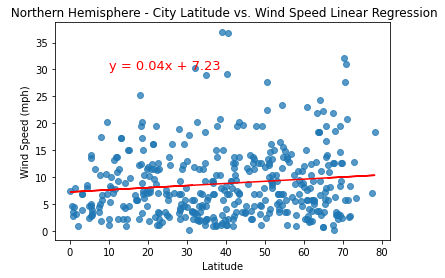

In [41]:
# Calculate correlation coefficient and linear regression model
x_values = north_values
y_values = clean_city_df.loc[north_filter, 'Wind Speed']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10, 30),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/north_lat_wind_regression.png', bbox_inches="tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.20796947907352253


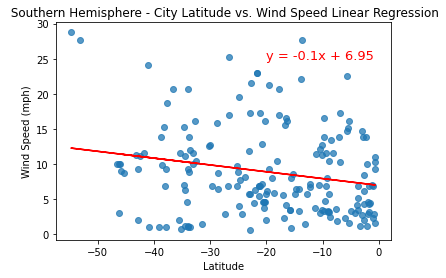

In [43]:
# Calculate correlation coefficient and linear regression model
x_values = south_values
y_values = clean_city_df.loc[south_filter, 'Wind Speed']

plt.scatter(x=x_values, y=y_values, marker='o', alpha=0.75)
plt.title(" Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression (01/26/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
correlation = sts.pearsonr(x_values, y_values) 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-20, 25),fontsize=13,color="red")

print(f'The r-value is {correlation[0]}')
plt.savefig('output_data/south_lat_wind_regression.png', bbox_inches="tight")
plt.show()

There appears to be a slight correlation between latitude and wind speed. In general, as latitudes approach the equator, wind speed decreases. 


# Observable Trends

* As mentioned above, latitudes closer to the equator in this model tend to have lower wind speeds. It would be an interesting analysis to compare wind speed with other values such as cloudiness, humidity, or minimum temperatures to find any possible correlation. One thing to note is that latitudes closer to the equator would tend to have smaller swings in temperature on any given day. Wind speeds increase with greater temperature differences, so it makes sense that cities farther from the equator would have a greater swing in teperature as well as wind speed. Further analysis could give more detail. 


* In both hemispheres, as latitudes approach the equator (latitude value of 0), max temperature increases. There is a strong correlation between latitude and temperature in the southern hemisphere, and a slightly stronger correlation in the northern hemisphere. The sharper decrease in maximum temperature in the northern hemisphere could be due to the fact that it is currently winter in the north and summer in the south. 


* The data denoting latitude vs humidity shows a great number of cities in this sample being at a relatively high humidity, but with more clustering of data in the northern hemisphere. This could be affected by the number of cities in this sample in the northern hemisphere, by the time of year, or there could be less cities populating the southern hemisphere overall, based on loctation of inhabitable land. 